In [248]:
# prosperous due diligence notebook
# much borrowed from derek cheung @derekcheung
# his code here https://t.co/HBUJiW6vmJ
# this version stays in the notebook and goes through some elements which we look at (as we would on BB)
# Thanks, Alex. 
# links 
# YT: https://www.youtube.com/channel/UCSgE2RSSMXPK1antbEeJ9lg
# Twitter: 𝙰𝚕𝚎𝚡𝚊𝚗𝚍𝚛𝚎 𝙵𝚞𝚌𝚑𝚜 (@urbanscribesays) / https://twitter.com/urbanscribesays


import os
import io
import sys
import warnings
import datetime
import numpy as np
import base64
import dotenv

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

from IPython.display import HTML

from openbb_terminal.reports import widget_helpers as widgets
from openbb_terminal.sdk import openbb
from openbb_terminal import config_terminal as cfg
from openbb_terminal.helper_classes import TerminalStyle
from openbb_terminal.core.config.paths import USER_ENV_FILE, REPOSITORY_DIRECTORY
import yfinance as yf
import pandas as pd

from jinja2 import Template

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
warnings.filterwarnings("ignore")

In [217]:
# cfg.theme = TerminalStyle("light", "light", "light")




In [218]:
#pick a ticker and its publicly traded competitors
# comment out so you can reuse

# symbol = "INTC"
# similar_companies = ["AMD","NVDA","TSM","ASML", "LCRX"]

# symbol = "CEQP"
# similar_companies = ["ET","AM","DCP","MPLX", "WES","EPD"]

symbol = "SNAP"
similar_companies = ["META","GOOG","PINS","MPLX", "MTCH"]


universe = [symbol] + similar_companies

In [219]:
ticker_data = openbb.stocks.load(
    symbol=symbol, start_date=datetime.datetime.now() - datetime.timedelta(days=18 * 30)
)
ticker_data = openbb.stocks.process_candle(data=ticker_data)

author = ""
report_title = f"Due Dili on {symbol.upper()}"
report_date = datetime.datetime.now().strftime("%d %B, %Y")
report_time = datetime.datetime.now().strftime("%H:%M")
report_timezone = datetime.datetime.now(datetime.timezone.utc).astimezone().tzinfo
report_title, report_date, report_time, report_timezone

Loading Daily data for SNAP with starting period 2021-08-16.

('Due Dili on SNAP',
 '06 February, 2023',
 '11:39',
 datetime.timezone(datetime.timedelta(days=-1, seconds=68400), 'EST'))

In [220]:
(
    df_year_estimates,
    df_quarter_earnings,
    df_quarter_revenues,
) = openbb.stocks.dd.est(symbol=symbol)
df_quarter_revenues

,Previous Quarter,Current Quarter,Next Quarter,Current Year,Next Year
QUARTER REVENUES ESTIMATES,,,,,
Date,ending 12/31/22,ending 03/31/23,ending 06/30/23,ending 12/31/23,ending 12/31/24
No. of Analysts,34,32,32,36,33
Average Estimate,"1,306 USD","1,012 USD","1,107 USD","4,743 USD","5,491 USD"
Year Ago,"1,298 USD","1,063 USD","1,111 USD","4,602 USD","4,743 USD"
Publish Date,1/31/2023,4/25/2023,7/25/2023,-,-


In [221]:
df_year_estimates

,2023,2024,2025,2026,2027
YEARLY ESTIMATES,,,,,
Revenue,"4,743","5,491","6,460","7,214","7,673"
Dividend,0.00,0.00,0.00,-,-
Dividend Yield (in %),-,-,-,-,-
EPS,-0.65,-0.43,-0.15,-0.10,0.02
P/E Ratio,-17.03,-25.48,-73.16,-110.06,550.30
EBIT,"-1,122",-830,-341,-214,-26
EBITDA,499,826,"1,320","1,555","1,698"
Net Profit,"-1,075",-731,-255,-166,32
Net Profit Adjusted,365,709,"1,119","1,416","1,408"


In [222]:
df_institutional_shareholders = openbb.stocks.fa.shrs(symbol, holder="institutional")
df_institutional_shareholders.index += 1
df_institutional_shareholders

,Holder,Shares,Date Reported,Stake,Value
1,"FMR, LLC",142.593 M,2022-09-29,10.49 %,1.685 B
2,"Vanguard Group, Inc. (The)",90.476 M,2022-09-29,6.66 %,1.069 B
3,Blackrock Inc.,37.389 M,2022-09-29,2.75 %,441.752 M
4,Goldman Sachs Group Inc,27.837 M,2022-09-29,2.05 %,328.895 M
5,"Two Sigma Advisers, LP",21.895 M,2022-09-29,1.61 %,258.692 M
6,Capital World Investors,16.990 M,2022-09-29,1.25 %,200.739 M
7,"Two Sigma Investments, LP",16.140 M,2022-09-29,1.19 %,190.691 M
8,Price (T.Rowe) Associates Inc,14.340 M,2022-09-29,1.06 %,169.430 M
9,JP Morgan Chase & Company,13.601 M,2022-09-29,1.00 %,160.692 M
10,State Street Corporation,12.527 M,2022-09-29,0.92 %,148.005 M


In [223]:
df_rating = openbb.stocks.dd.rating(symbol)
df_rating

,Rating,DCF,ROE,ROA,DE,PE,PB
date,,,,,,,
2023-02-03,Buy,Strong Buy,Sell,Neutral,Strong Buy,Strong Sell,Strong Buy
2023-02-02,Buy,Strong Buy,Sell,Neutral,Strong Buy,Strong Sell,Strong Buy
2023-02-01,Buy,Strong Buy,Sell,Neutral,Strong Buy,Strong Sell,Strong Buy
2023-01-31,Buy,Strong Buy,Sell,Neutral,Strong Buy,Strong Sell,Strong Buy
2023-01-30,Buy,Strong Buy,Sell,Neutral,Buy,Strong Sell,Strong Buy
...,...,...,...,...,...,...,...
2017-04-06,Neutral,Buy,Sell,Sell,Neutral,Strong Sell,Strong Buy
2017-04-05,Neutral,Buy,Sell,Sell,Neutral,Strong Sell,Strong Buy
2017-04-04,Neutral,Buy,Sell,Sell,Neutral,Strong Sell,Strong Buy


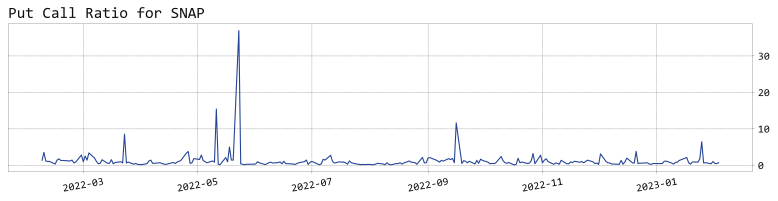

In [224]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.options.pcr_chart(
    symbol,
    window=30,
    external_axes=[
        ax,
    ],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
pcr_chart = f.getvalue().decode("utf-8")

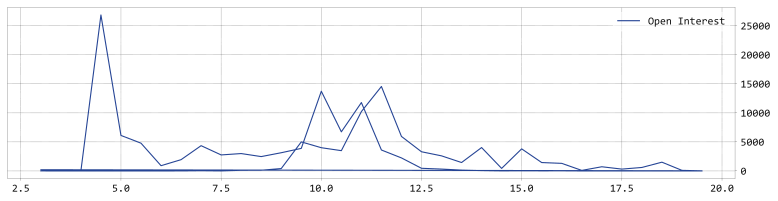

In [225]:
expiry_dates = openbb.stocks.options.expirations(symbol)
if (len(expiry_dates) > 0):
    exp = expiry_dates[0]
    option_chain = openbb.stocks.options.chains(symbol, expiration=exp)
else:
    option_chain = pd.DataFrame()


if not option_chain.empty:
    fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
    ax.plot(
        option_chain["strike"], option_chain["openInterest"], label="Open Interest"
    )
    ax.legend()
    fig.tight_layout()
    f = io.BytesIO()
    fig.savefig(f, format="svg")
    vol_chart = f.getvalue().decode("utf-8")

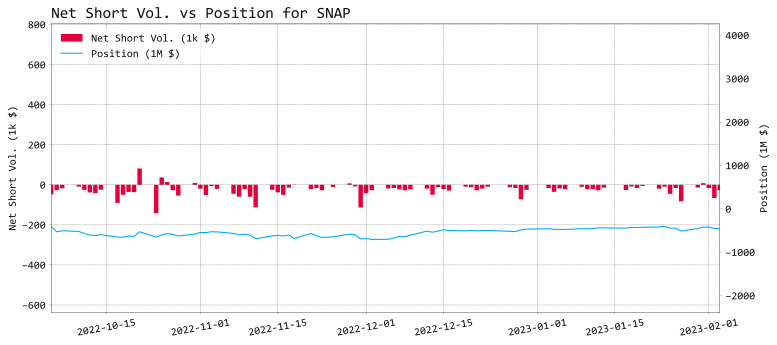

In [226]:
fig, ax1 = plt.subplots(figsize=(11, 5), dpi=150)
ax2 = ax1.twinx()
openbb.stocks.dps.spos_chart(
    symbol=symbol,
    limit=84,
    raw=False,
    export="",
    external_axes=[ax1, ax2],
)
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
net_short_position = f.getvalue().decode("utf-8")

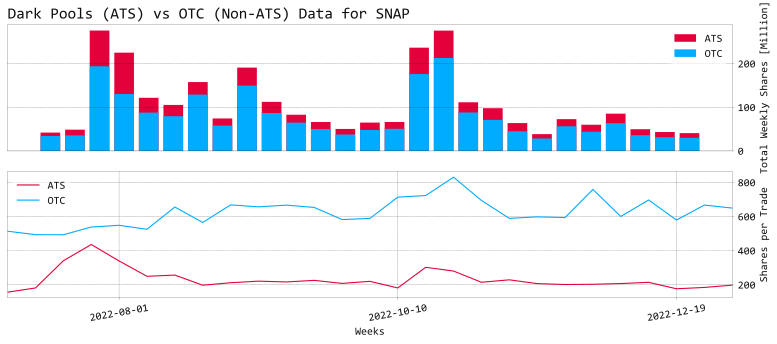

In [227]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.stocks.dps.dpotc_chart(symbol=symbol, external_axes=[ax1, ax2])
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
dark_pools = f.getvalue().decode("utf-8")

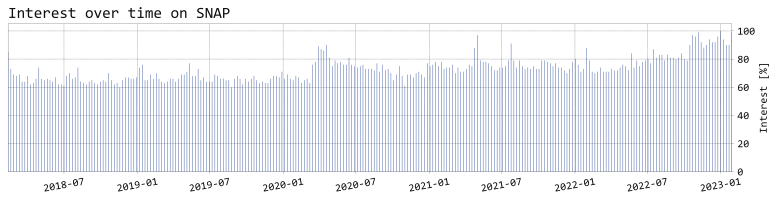

In [228]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.ba.mentions_chart(
    symbol,
    external_axes=[
        ax,
    ],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
google_mentions_chart = f.getvalue().decode("utf-8")

In [229]:
valuation_comparison = openbb.stocks.ca.screener(universe, "valuation")
valuation_comparison = valuation_comparison.drop(columns=['EPS next 5Y', 'PEG', 'Sales past 5Y'])
valuation_comparison['Market Cap']=valuation_comparison['Market Cap'].apply(lambda x: "${0:.0f} M".format(x/1000000))

valuation_comparison = valuation_comparison.style.format({"EPS this Y": "${:,.2f}", "EPS next Y": "${:,.2f}", "EPS past 5Y": "${:,.2f}", 
                                                          "P/E": "{:,.2f}", "Fwd P/E":"{:,.2f}", "P/S": "{:,.2f}" , "P/B": "{:,.2f}" , 
                                                          "P/C":"{:,.2f}", "P/FCF": "{:,.2f}"} 
                                                        )
                                                      
#valuation_comparison['EPS this Y']=valuation_comparison['EPS this Y'].apply(lambda x: "${:,.2f}".format(x))

valuation_comparison

,Ticker,Market Cap,P/E,Fwd P/E,P/S,P/B,P/C,P/FCF,EPS this Y,EPS next Y,EPS past 5Y,Price,Change,Volume
0,GOOG,$1358850 M,20.20,17.28,4.82,5.38,nan,nan,$0.14,$0.17,$0.28,103.160000,-0.019600,10387506.000000
1,META,$494990 M,22.32,16.50,4.24,3.92,12.15,25.99,$-0.42,$0.22,$0.05,188.050000,0.008100,18853114.000000
2,MPLX,$34980 M,9.03,9.38,3.15,2.91,289.12,34.81,$4.57,$0.04,$2.95,34.020000,-0.002100,456521.000000
3,MTCH,$14680 M,38.06,18.82,4.60,nan,36.86,28.98,$-0.56,$0.21,$0.07,47.710000,-0.015400,1666263.000000
4,PINS,$19740 M,197.70,36.40,7.12,5.85,7.40,33.39,$3.38,$0.24,$0.28,27.730000,0.009100,6142847.000000
5,SNAP,$17940 M,nan,28.72,3.90,6.71,4.56,324.50,$-1.84,$0.49,$0.21,11.730000,0.066500,19959088.000000


In [230]:
hist_ratios = openbb.stocks.fa.ratios(symbol)
hist_ratios

Fiscal Date Ending,2022,2021,2020,2019,2018
Period,FY,FY,FY,FY,FY
Current ratio,4.324,5.699,5.002,5.291,5.726
Quick ratio,4.214,5.590,4.918,5.213,5.583
Cash ratio,1.171,2.341,0.818,1.041,1.323
Days of sales outstanding,93.838,94.762,108.379,104.720,109.757
Days of inventory outstanding,0,0,0,0,0
Operating cycle,93.838,94.762,108.379,104.720,109.757
Days of payables outstanding,36.548,26.127,22.196,19.103,14.107
Cash conversion cycle,57.290,68.635,86.183,85.617,95.650
Gross profit margin,0.606,0.575,0.528,0.478,0.323


In [231]:
a = openbb.stocks.ca.screener
dir(a)
help(a)

Help on Operation in module openbb_terminal.core.library.operation:

<openbb_terminal.core.library.operation.Operation object>
    Screener Overview.
    
    Parameters
    ----------
    similar:
        List of similar companies.
        Comparable companies can be accessed through
        finnhub_peers(), finviz_peers(), polygon_peers().
    data_type : str
        Data type between: overview, valuation, financial, ownership, performance, technical
    
    Returns
    -------
    pd.DataFrame
        Dataframe with overview, valuation, financial, ownership, performance or technical



In [232]:
financial_comparison = openbb.stocks.ca.screener(universe, "valuation")
# financial_comparison = financial_comparison.drop(columns=['Change'])


financial_comparison['Market Cap'] = financial_comparison['Market Cap'].apply(lambda x: '{:,.0f}'.format(x/1000))
financial_comparison['Volume'] = financial_comparison['Volume'].apply(lambda x: '{:,.0f}'.format(x/1000))
financial_comparison['EPS next 5Y']=financial_comparison['EPS next 5Y'].apply(lambda x: "{0:.1f}%".format(x*100))
financial_comparison['Sales past 5Y']=financial_comparison['Sales past 5Y'].apply(lambda x: "{0:.1f}%".format(x*100))

# financial_comparison['Market Cap']=financial_comparison['Market Cap'].apply(lambda x: "{0:0f}".format(x*100))
financial_comparison

,Ticker,Market Cap,P/E,Fwd P/E,PEG,P/S,P/B,P/C,P/FCF,EPS this Y,EPS next Y,EPS past 5Y,EPS next 5Y,Sales past 5Y,Price,Change,Volume
0,GOOG,"1,358,850,000",20.20,17.28,1.98,4.82,5.38,NaN,NaN,0.138,0.1730,0.2848,10.2%,nan%,103.16,-0.0196,"10,388"
1,META,"494,990,000",22.32,16.50,6.14,4.24,3.92,12.15,25.99,-0.417,0.2172,0.0540,3.6%,23.5%,188.05,0.0081,"18,853"
2,MPLX,"34,980,000",9.03,9.38,1.19,3.15,2.91,289.12,34.81,4.568,0.0374,2.9530,7.6%,27.1%,34.02,-0.0021,457
3,MTCH,"14,680,000",38.06,18.82,1.73,4.60,NaN,36.86,28.98,-0.559,0.2130,0.0660,22.0%,21.7%,47.71,-0.0154,"1,666"
4,PINS,"19,740,000",197.70,36.40,NaN,7.12,5.85,7.40,33.39,3.385,0.2357,0.2840,-2.7%,53.9%,27.73,0.0091,"6,143"
5,SNAP,"17,940,000",NaN,28.72,NaN,3.90,6.71,4.56,324.50,-1.840,0.4903,0.2140,49.8%,41.0%,11.73,0.0665,"19,959"


In [233]:

openbb.stocks.ca.cashflow(universe, timeframe="2022")

Other available yearly timeframes are: 2022, 2018, 2019, 2020, 2021

,SNAP,META,GOOG,PINS,MPLX,MTCH
Item,,,,,,
Net Income before Extraordinaries,(1.43B),23.2B,59.97B,NaN,-,360.1M
Net Income Growth,-,-,-,NaN,-,-
"Depreciation, Depletion & Amortization",202.17M,8.69B,15.93B,NaN,-,409.85M
Depreciation and Depletion,-,-,-,NaN,-,-
Amortization of Intangible Assets,-,-,-,NaN,-,-
Deferred Taxes & Investment Tax Credit,-,(3.29B),(8.08B),NaN,-,(29.95M)
Deferred Taxes,-,-,-,NaN,-,-
Investment Tax Credit,-,-,-,NaN,-,-
Other Funds,1.45B,16.19B,25.91B,NaN,-,210.88M


In [234]:
financial_comparison = openbb.stocks.ca.screener(universe, "financial")
financial_comparison = financial_comparison.drop(columns=['Change', 'Volume', 'Earnings', 'Price','Market Cap'])
financial_comparison['Dividend']=financial_comparison['Dividend'].apply(lambda x: "{0:.1f}%".format(x*100))
financial_comparison['ROA']=financial_comparison['ROA'].apply(lambda x: "{0:.1f}%".format(x*100))
financial_comparison['ROE']=financial_comparison['ROE'].apply(lambda x: "{0:.1f}%".format(x*100))
financial_comparison['ROI']=financial_comparison['ROI'].apply(lambda x: "{0:.1f}%".format(x*100))
financial_comparison['Gross M']=financial_comparison['Gross M'].apply(lambda x: "{0:.1f}%".format(x*100))
financial_comparison['Oper M']=financial_comparison['Oper M'].apply(lambda x: "{0:.1f}%".format(x*100))
financial_comparison['Profit M']=financial_comparison['Profit M'].apply(lambda x: "{0:.1f}%".format(x*100))
financial_comparison= financial_comparison.fillna("")
#financial_comparison = financial_comparison.rename(columns={'Gross M': 'Gross Margin', 'Oper M': 'Operating Margin', 'Profit M': 'Profit Margin'})
financial_comparison

,Ticker,Dividend,ROA,ROE,ROI,Curr R,Quick R,LTDebt/Eq,Debt/Eq,Gross M,Oper M,Profit M
0,GOOG,nan%,nan%,nan%,nan%,,,,,nan%,nan%,nan%
1,META,nan%,13.3%,18.6%,16.0%,2.2,2.2,0.08,0.08,78.3%,24.8%,19.9%
2,MPLX,9.1%,8.9%,28.0%,13.0%,0.8,0.7,1.67,1.75,54.8%,38.4%,28.7%
3,MTCH,nan%,2.4%,-30.1%,11.6%,1.2,1.2,,,69.9%,20.4%,3.5%
4,PINS,nan%,1.7%,2.0%,10.6%,9.5,9.5,0.0,0.0,77.1%,2.6%,2.2%
5,SNAP,nan%,-16.8%,-45.8%,-22.5%,4.3,4.3,1.45,1.45,61.0%,-30.3%,-31.1%


In [235]:
ownership_comparison = openbb.stocks.ca.screener(universe, "ownership")
ownership_comparison = ownership_comparison.drop(columns=['Market Cap', 'Change', 'Volume', 'Avg Volume', 'Price'])
ownership_comparison= ownership_comparison.fillna("")

#format them a bit
ownership_comparison['Float'] = ownership_comparison['Float'].apply(lambda x: '{:,.0f}'.format(x))
ownership_comparison['Outstanding'] = ownership_comparison['Outstanding'].apply(lambda x: '{:,.0f}'.format(x))

ownership_comparison



,Ticker,Outstanding,Float,Insider Own,Insider Trans,Inst Own,Inst Trans,Float Short,Short Ratio
0,GOOG,"6,090,000,000","5,200,000,000",0.0004,0.2320,0.6444,,0.0055,1.12
1,META,"2,640,000,000","2,230,000,000",0.0022,-0.0303,0.7520,-0.0156,0.0129,0.78
2,MPLX,"1,010,000,000","352,740,000",0.0010,0.0000,0.2330,-0.0272,0.0433,9.38
3,MTCH,"281,310,000","277,470,000",0.0040,0.0000,0.9760,-0.0308,0.0334,2.06
4,PINS,"669,170,000","582,720,000",0.0040,-0.5976,0.9100,0.0218,0.0546,2.84
5,SNAP,"1,570,000,000","1,220,000,000",0.0850,-0.0124,0.5500,-0.1202,0.0472,1.81


In [236]:
performance_comparison = openbb.stocks.ca.screener(universe, "performance")
performance_comparison = performance_comparison.drop(columns=['Rel Volume', 'Avg Volume', 'Price','Change','Volume'])
performance_comparison['Perf Week']=performance_comparison['Perf Week'].apply(lambda x: "{0:.1f}%".format(x*100))
performance_comparison['Perf Month']=performance_comparison['Perf Month'].apply(lambda x: "{0:.1f}%".format(x*100))
performance_comparison['Perf Quart']=performance_comparison['Perf Quart'].apply(lambda x: "{0:.1f}%".format(x*100))
performance_comparison['Perf Half']=performance_comparison['Perf Half'].apply(lambda x: "{0:.1f}%".format(x*100))
performance_comparison['Perf Year']=performance_comparison['Perf Year'].apply(lambda x: "{0:.1f}%".format(x*100))
performance_comparison['Perf YTD']=performance_comparison['Perf YTD'].apply(lambda x: "{0:.1f}%".format(x*100))
performance_comparison= performance_comparison.fillna("")
performance_comparison

,Ticker,Perf Week,Perf Month,Perf Quart,Perf Half,Perf Year,Perf YTD,Volatility W,Volatility M,Recom
0,GOOG,5.3%,18.9%,23.6%,-12.7%,-27.7%,16.3%,0.0293,0.0275,1.5
1,META,27.9%,48.1%,111.5%,12.5%,-20.9%,56.3%,0.0518,0.0370,2.2
2,MPLX,-1.9%,3.2%,0.1%,12.8%,2.2%,3.6%,0.0162,0.0156,2.3
3,MTCH,-9.0%,12.2%,11.5%,-29.6%,-57.4%,15.0%,0.0548,0.0430,2.2
4,PINS,7.0%,17.6%,21.7%,23.0%,13.1%,14.2%,0.0409,0.0447,2.6
5,SNAP,5.8%,28.4%,28.1%,15.2%,-52.1%,31.1%,0.0637,0.0560,2.9


In [237]:
try:
    df_related_queries = openbb.stocks.ba.queries(symbol)
    df_related_queries.index += 1
    df_related_queries.index
except:
    pass

try:
    df_rising_queries = openbb.stocks.ba.rise(symbol)
    df_rising_queries.index += 1
    df_rising_queries
except:
    pass

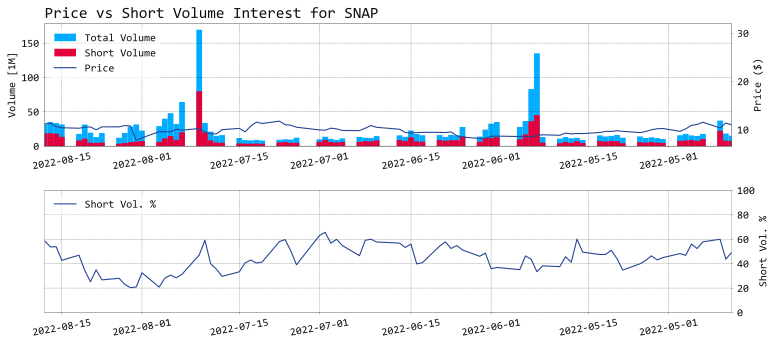

In [238]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
ax3 = ax1.twinx()
openbb.stocks.dps.psi_sg_chart(
    symbol=symbol,
    external_axes=[ax1, ax2, ax3],
)
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
price_vs_short_interest = f.getvalue().decode("utf-8")

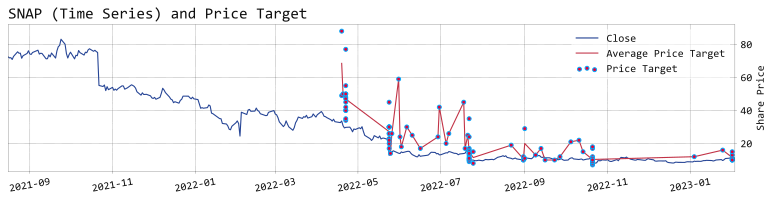

In [239]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.dd.pt_chart(
    symbol=symbol,
    start_date="2022-01-01",
    data=ticker_data,
    limit=10,
    raw=False,
    external_axes=[ax],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
price_target_chart = f.getvalue().decode("utf-8")

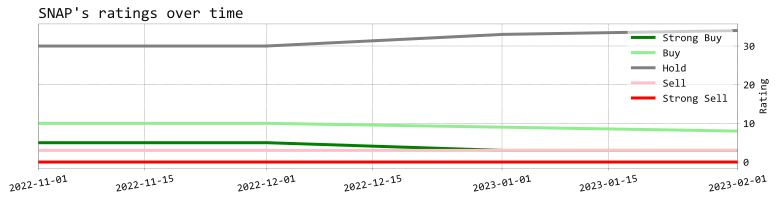

In [240]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.dd.rot_chart(
    symbol=symbol,
    limit=10,
    raw=False,
    export="",
    external_axes=[ax],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
ratings_over_time_chart = f.getvalue().decode("utf-8")

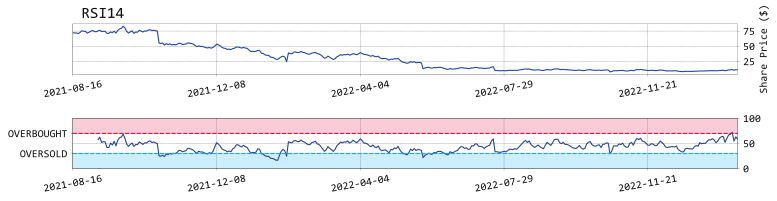

In [241]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 3), dpi=150)
openbb.ta.rsi_chart(ticker_data["Close"], external_axes=[ax1, ax2])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
ta_rsi = f.getvalue().decode("utf-8")

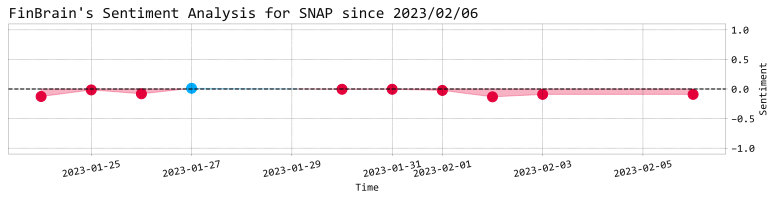

In [242]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.ba.headlines_chart(symbol=symbol, external_axes=[ax])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
finbrain_sentiment = f.getvalue().decode("utf-8")

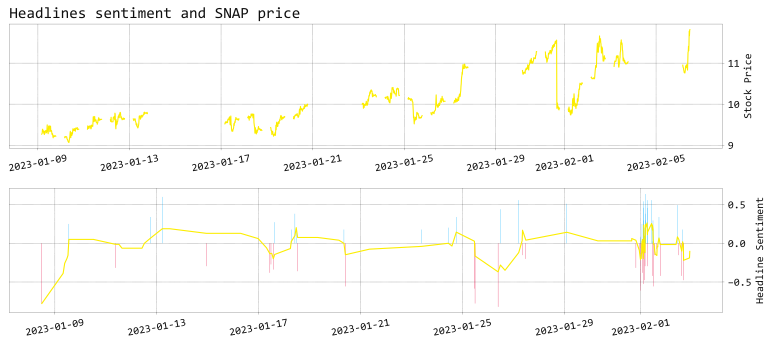

In [243]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.stocks.ba.snews_chart(symbol, external_axes=[ax1, ax2])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
snews = f.getvalue().decode("utf-8")

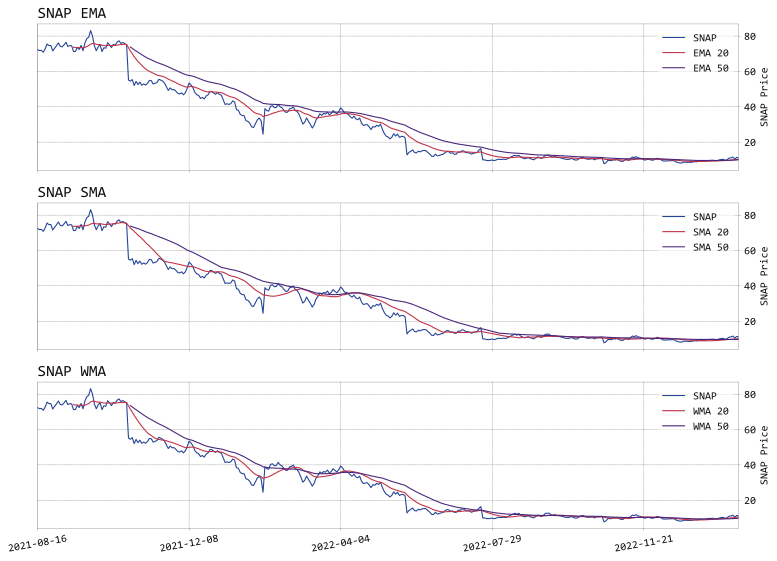

In [244]:
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3, ncols=1, figsize=(11, 8), sharex=True, dpi=150
)
openbb.ta.ma(ticker_data["Close"], symbol=symbol, external_axes=[ax1])
openbb.ta.ma(ticker_data["Close"], symbol=symbol, ma_type="SMA", external_axes=[ax2])
openbb.ta.ma(ticker_data["Close"], symbol=symbol, ma_type="WMA", external_axes=[ax3])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
ma_chart = f.getvalue().decode("utf-8")

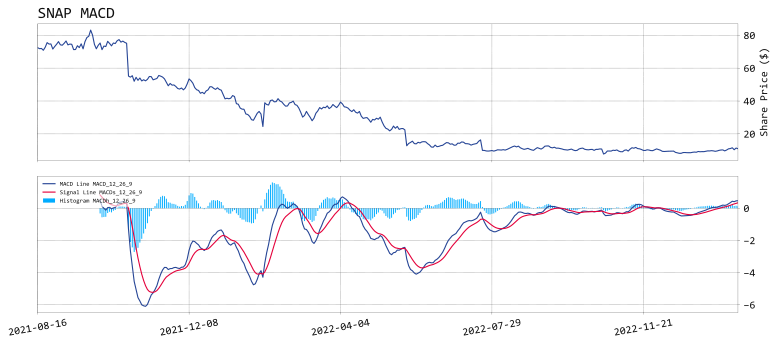

In [245]:
fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), sharex=True, dpi=150)
openbb.ta.macd_chart(ticker_data["Close"], symbol=symbol, external_axes=[ax, ax1])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
macd_chart = f.getvalue().decode("utf-8")

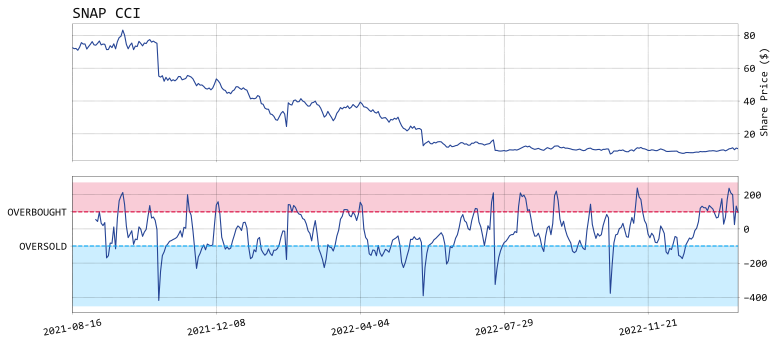

In [246]:
fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), sharex=True, dpi=150)
openbb.ta.cci_chart(ticker_data, symbol=symbol, external_axes=[ax, ax1])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
cci_chart = f.getvalue().decode("utf-8")

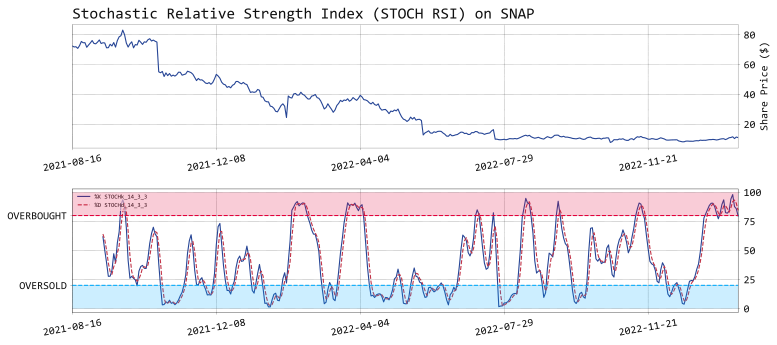

In [247]:
fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
ax2 = ax1.twinx()
openbb.ta.stoch_chart(ticker_data, symbol=symbol, external_axes=[ax, ax1, ax2])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
stoch_chart = f.getvalue().decode("utf-8")